# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look (Called Version 3)

# Fluxonium Design version 3.2: with this version the Ec is 1.26GHz. Check details.
# And LP's are 200nm.

## Design&LOM

### Preparations

In [14]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-15um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '400um', pad_height = '120um',
            pad_sep='75um', 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

In [4]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '110um',                      
  'pad_radius'        : '45um',                       
  'l_width'           : '1um',                        
  'l_length'          : '100um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'L_j'               : '34.38nH',                    
  'pocket_width'      : '900um',                      
  'pocket_hei

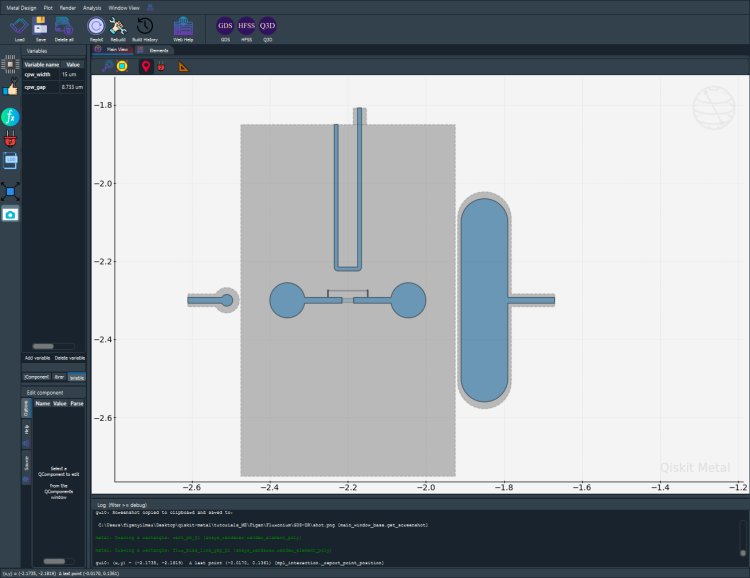

In [29]:
#Save screenshot as a .png formatted file.
gui.screenshot()

# LOM Fluxonium Qubits

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [5]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [6]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [7]:
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings

c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [8]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 09:20PM [connect_project]: Connecting to Ansys Desktop API...
INFO 09:20PM [load_ansys_project]: 	Opened Ansys App
INFO 09:20PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 09:20PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    //tudelft.net/staff-homes/Y/figenyilmaz/My Documents/Ansoft/
	Project:   Project12
INFO 09:20PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 09:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:20PM [connect]: 	Connected to project "Project12" and design "Design_q3d" 😀 

INFO 09:20PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 09:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:20PM [analyze]: Analyzing setup Setup
INFO 09:22PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmppo9fmsg5.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF"

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.22750,-0.13415,-21.33007,-0.06275,-0.42662,-0.05752
flux_bias_line_Q1,-0.13415,58.96833,-45.75028,-4.12374,-4.13208,-2.70915
ground_main_plane,-21.33007,-45.75028,334.09774,-16.34143,-19.90324,-162.19393
pad_bot_Q1,-0.06275,-4.12374,-16.34143,29.55605,-2.84091,-5.00732
pad_top_Q1,-0.42662,-4.13208,-19.90324,-2.84091,29.55466,-1.07859
readout_padNline_Q1,-0.05752,-2.70915,-162.19393,-5.00732,-1.07859,173.66493


In [9]:
# capacitance with pocket-height=650um

Cpad_top = 19.903
Cpad_bot = 16.341
Creadout_bot = 5.007
Creadout_top = 1.07859
Ccharge_top = 0.426
Cfluxpad_top = 4.132
Cfluxpad_bot = 4.123

C_pads = 2.840

C_top = Cpad_top + Ccharge_top + Cfluxpad_top + Creadout_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Total Capacitance:', Csigma, 'fF')

Total Capacitance: 15.592624443081329 fF


In [10]:
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 1242.2686928305598 MHz


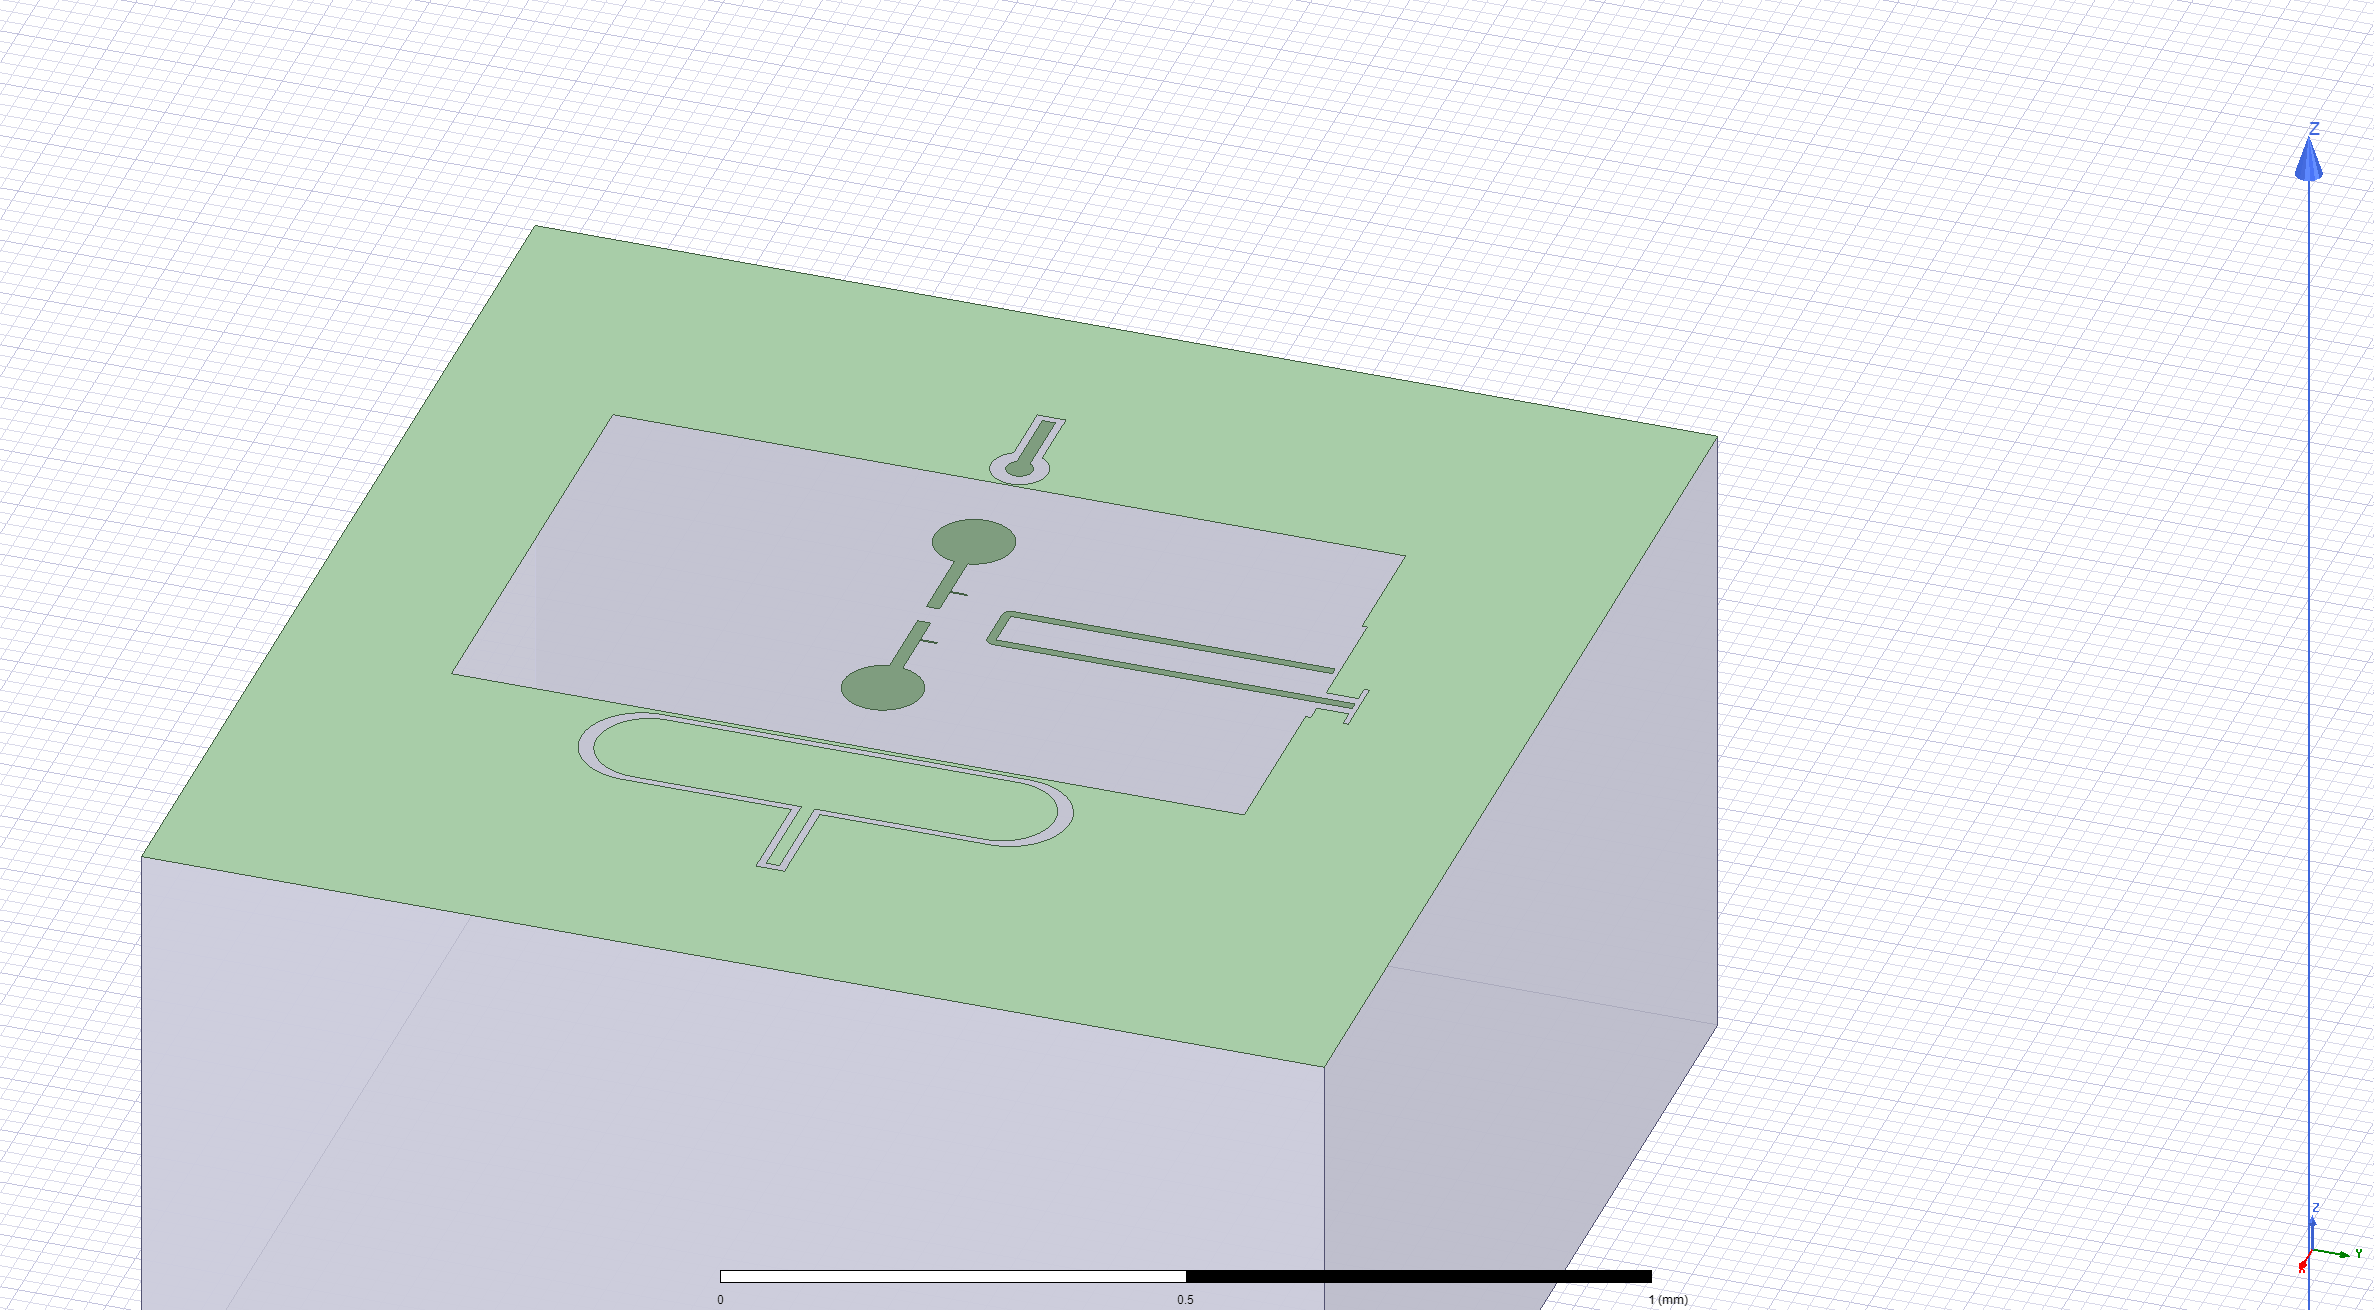

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [30]:
c1.sim.save_screenshot()

In [ ]:
gui.main_window.close()

## EPR

In [17]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

gui = MetalGUI(design)

In [19]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-15um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '400um', pad_height = '120um',
            pad_sep='75um', 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))


# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                 cl_sep ='-15um'), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              pad_width = '400um', pad_height = '120um',
            pad_sep='75um',) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                             cl_sep ='-15um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
             pad_width = '400um', pad_height = '120um',
            pad_sep='75um', ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
                      
    flux_bias_line_options=Dict(make_fbl = True,
         fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                             cl_sep ='-15um'), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
             pad_width = '400um', pad_height = '120um',
            pad_sep='75um', ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            cl_sep ='-15um' ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
             pad_width = '400um', pad_height = '120um',
            pad_sep='75um', ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                             cl_sep ='-15um'),
    readout_line_options=Dict(loc_H = 1, make_rol = True,
             pad_width = '400um', pad_height = '120um',
            pad_sep='75um', ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))


gui.rebuild()

In [20]:
# Lambda/2 resonator for Q1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

# Lambda/2 resonator for Q6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))

# Lambda/2 resonator for Q2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-0.2mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

# Lambda/2 resonator for Q5
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.9mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))

# Lambda/2 resonator for Q3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

# Lambda/2 resonator for Q4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.9mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [21]:
hfss.open_ansys()

In [22]:
hfss.connect_ansys()

INFO 09:36PM [connect_project]: Connecting to Ansys Desktop API...
INFO 09:36PM [load_ansys_project]: 	Opened Ansys App
INFO 09:36PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 09:36PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    //tudelft.net/staff-homes/Y/figenyilmaz/My Documents/Ansoft/
	Project:   Project12
INFO 09:36PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 09:36PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:36PM [connect]: 	Connected to project "Project12" and design "Design_q3d" 😀 



In [23]:
hfss.activate_eigenmode_design("Q1-Res1")

09:39PM 24s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
09:39PM 24s WARNING [activate_ansys_design]: The design_name=Q1-Res1 was not in active project.  Designs in active project are: 
['Design_q3d'].  A new design will be added to the project.  
INFO 09:39PM [connect_design]: 	Opened active design
	Design:    Q1-Res1 [Solution type: Eigenmode]
WARNING 09:39PM [connect_setup]: 	No design setup detected.
WARNING 09:39PM [connect_setup]: 	Creating eigenmode default setup.
INFO 09:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [24]:
hfss.render_design(['Q1', 'cavity1', 'otg1s'],[('cavity1', 'end')])

In [28]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 12
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 09:43PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


10:05PM 59s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


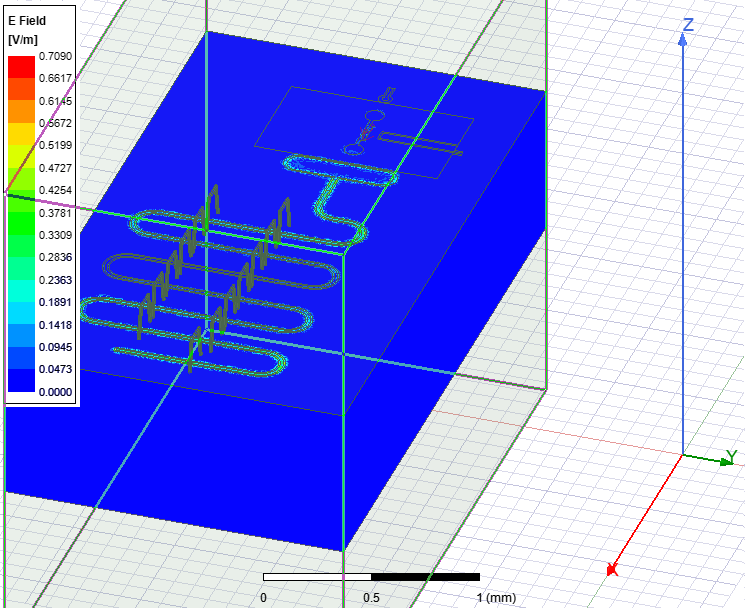

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [29]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [30]:
hfss.epr_get_frequencies()

Design "Q1-Res1" info:
	# eigenmodes    2
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        6.322907             inf
          1        7.070411             inf

In [31]:
hfss.activate_eigenmode_design("Q2-Res2")

10:06PM 26s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
10:06PM 26s WARNING [activate_ansys_design]: The design_name=Q2-Res2 was not in active project.  Designs in active project are: 
['Q1-Res1', 'Design_q3d'].  A new design will be added to the project.  
INFO 10:06PM [connect_design]: 	Opened active design
	Design:    Q2-Res2 [Solution type: Eigenmode]
WARNING 10:06PM [connect_setup]: 	No design setup detected.
WARNING 10:06PM [connect_setup]: 	Creating eigenmode default setup.
INFO 10:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [32]:
hfss.render_design(['Q2', 'cavity2', 'otg2s'],[('cavity2', 'end')])

In [33]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 12
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 10:06PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


In [ ]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [ ]:
hfss.epr_get_frequencies()

In [ ]:
hfss.activate_eigenmode_design("Q3-Res3")

In [ ]:
hfss.render_design(['Q3', 'cavity3', 'otg3s'],[('cavity3', 'end')])

In [ ]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 12
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

In [ ]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [ ]:
hfss.activate_eigenmode_design("Q4-Res4")

In [ ]:
hfss.render_design(['Q4', 'cavity4', 'otg4s'],[('cavity4', 'end')])

In [ ]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

In [ ]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [ ]:
hfss.activate_eigenmode_design("Q5-Res5")

In [ ]:
hfss.render_design(['Q5', 'cavity5', 'otg5s'],[('cavity5', 'end')])

In [ ]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

In [ ]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [ ]:
hfss.activate_eigenmode_design("Q6-Res6")

In [ ]:
hfss.render_design(['Q6', 'cavity6', 'otg6s'],[('cavity6', 'end')])

In [ ]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

In [ ]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [ ]:
hfss.disconnect_ansys()

In [33]:
gui.main_window.close()

True